In [3]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


sns.set(context='talk', style='whitegrid')


np.random.seed(8)
pd.set_option('display.max_columns', 100)


In [5]:
# === Synthetic dataset generator ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})

base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# Inject missing values and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12

# Show first 5 rows and basic info
df.head(), df.info(), df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(        date region   age    income  transactions   spend
 0 2021-02-01   West  37.6  28086.81             4   73.35
 1 2021-02-02  North  43.0  33034.75             1   52.37
 2 2021-02-03  South  38.2  50045.39             2  131.85
 3 2021-02-04  South  24.9  39467.28             4  147.58
 4 2021-02-05  South  59.8  31201.65             1   86.76,
 None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

In [6]:
# Numeric columns
numeric_cols = ['age', 'income', 'transactions', 'spend']
desc = df[numeric_cols].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in numeric_cols]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in numeric_cols]
print("Numeric Summary with Skew & Kurtosis:\n", desc)

# Categorical columns
categorical_cols = ['region']
cat_summary = df[categorical_cols].describe()
print("\nCategorical Summary:\n", cat_summary)

# Missing values check
missing_counts = df.isna().sum()
print("\nMissing Values:\n", missing_counts)


Numeric Summary with Skew & Kurtosis:
               count          mean           std       min       25%       50%  \
age           160.0     40.018750      8.458676     22.00     34.70     40.15   
income        155.0  41983.866323  13262.457038  17928.80  32471.53  39332.52   
transactions  160.0      3.237500      2.585610      0.00      2.00      3.00   
spend         157.0    117.291592     51.768645      0.54     77.25    119.32   

                    75%       max      skew   kurtosis  
age              44.925     61.10  0.069538  -0.080125  
income        49697.690  87052.40  0.993336   0.918722  
transactions      4.000     20.00  3.466078  19.984802  
spend           153.340    280.05  0.130860  -0.084917  

Categorical Summary:
        region
count     160
unique      4
top      West
freq       47

Missing Values:
 date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64


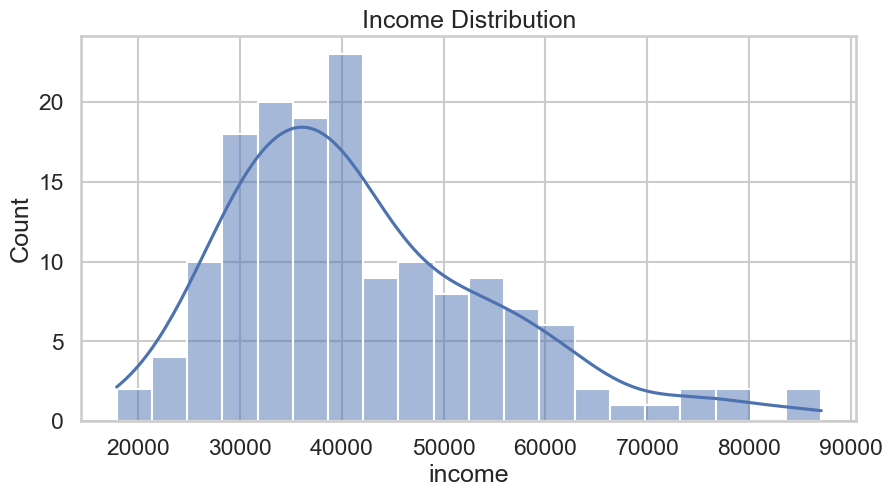

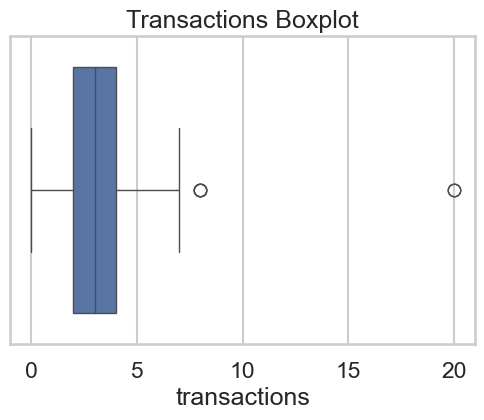

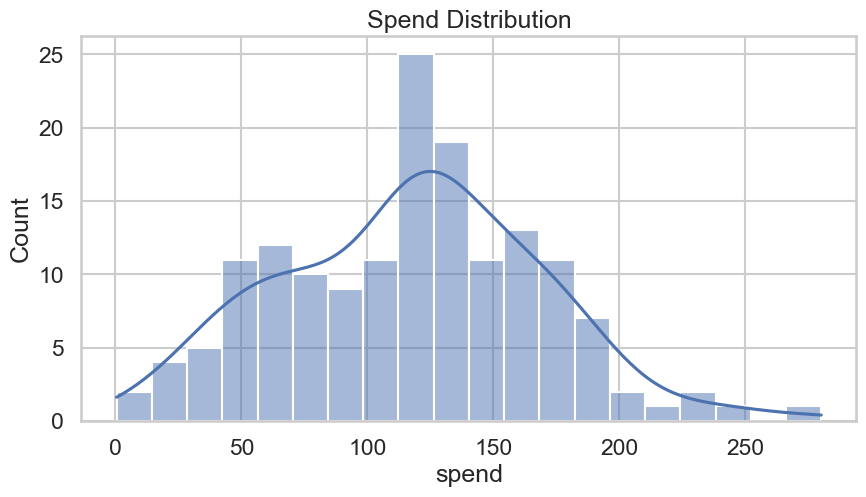

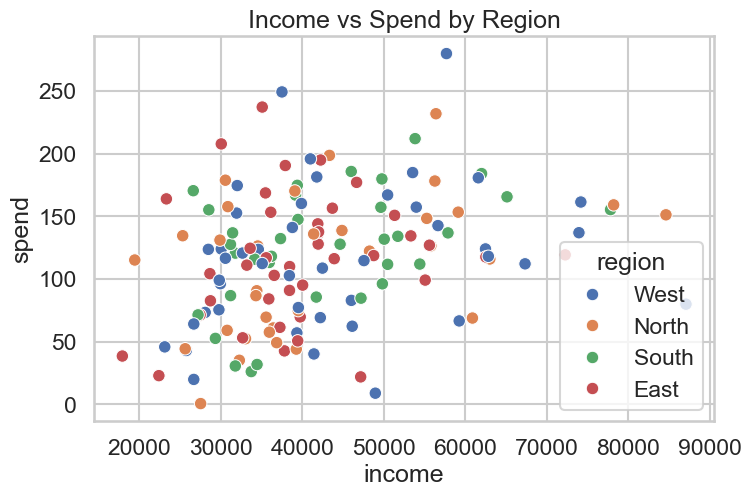

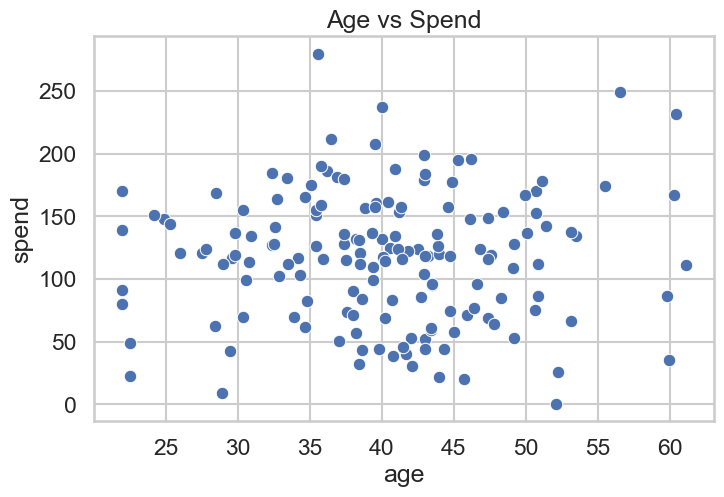

In [7]:
# Distribution plots
plt.figure(figsize=(10,5))
sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['transactions'])
plt.title('Transactions Boxplot')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['spend'], kde=True, bins=20)
plt.title('Spend Distribution')
plt.show()

# Bivariate relationships
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend by Region')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()


## Step 5: Observations & Insights

### Numeric Observations
- `income` is slightly right-skewed, with most values clustered between 30k-50k.
- `transactions` shows high skew and extreme outliers (up to 20 transactions in a day).
- `spend` is moderately distributed with some high outliers.
- Missing values detected: 5 in `income`, 3 in `spend`.

### Categorical Observations
- `region` has 4 categories: North, South, East, West.
- `West` is the most frequent region.

### Relationships
- `Income vs Spend`: Positive trend; higher income usually leads to higher spending.
- `Age vs Spend`: Weak trend; age does not strongly correlate with spending.
- Some outliers in `transactions` and `spend` may distort mean-based analysis.

### Seasonality / Patterns
- No obvious seasonality detected in this synthetic dataset (dates are consecutive without weekends/weekdays effects).

### Implications for Next Steps
- Consider imputing missing values in `income` and `spend`.
- Outliers in `transactions` and `spend` may need winsorization or filtering.
- Features like `income` and `transactions` could be engineered (log-transform, normalized, or binned).


## Top 3 Insights

1. **Income drives spending**: There is a clear positive relationship between `income` and `spend`. Higher income customers tend to spend more.  
2. **Outliers may distort analysis**: `transactions` and `spend` have extreme values that could affect mean-based metrics.  
3. **Missing data requires handling**: 5 missing values in `income` and 3 in `spend` need imputation before modeling.

## Assumptions & Risks

- Assumption: The synthetic dataset reasonably reflects expected patterns in the real dataset.  
- Risk: Outliers and missing values may bias regression or predictive modeling if not treated properly.  
- Assumption: Region categories are balanced enough to be used as categorical features.  
- Risk: Limited variability in age may reduce its predictive power for spend.
